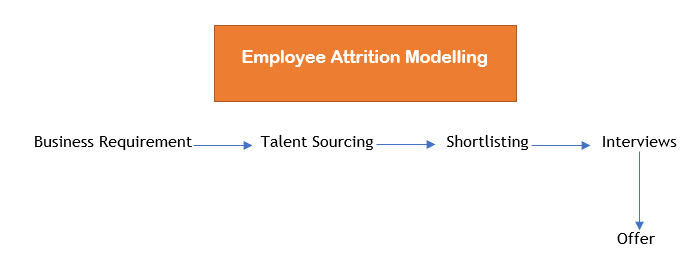

This is how a normal HR flow works

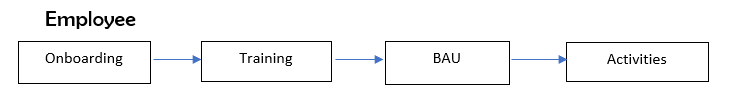

<b>Onboarding</b><br>
    * Documentation	<br>
    * Policies<br>
    * Business Orientation<br>
    * Perks/ Benefits                           
<br>
<b>Training</b><br>
    * Team level inductions<br>
    * Functional Training <br>
    * Technical Training<br>
    * Get eased into the role<br>
<br>
<b>BAU</b><br>
    * Deliverables<br>
    * Expectations set(usually by team leads or managers)<br>
    * Employee engages(this is where it starts - working in a new company)<br>
<br>
<b>Activities</b><br>
    * Team outings<br>
    * Business updates<br>
    * Townhall<br>
    * Gatherings - Formal and Informal both
 
    

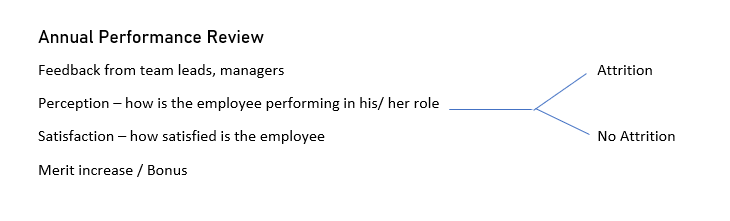

## Problem Statement

### Objective
    
    We want to uncover the drivers of attrition and build a model to predict the propensity of employee attrition.
    
### Learning

    We need to learn the major issues that affect employee attrition which can be discussed with managers. In this project    we will try to predict employee attrition with 90% accuracy and see which segment of the company workforce needs to be   focused upon in order to reduce attrition.

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set_style('white')

In [3]:
# Setting some default stylings for our visualizations

rcParams['font.family'] = 'comic sans ms'
rcParams['figure.figsize'] = (11, 8)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

## Importing the data


In [4]:
data = pd.read_csv("employee_attrition.csv")

In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.shape

(1470, 35)

In [7]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
# setting display option to ensure maximum visibilty of columns
pd.set_option('display.max_columns', None)

In [9]:
# warning suppressions - we want to ignore all the warnings shown during execution of our code
import warnings
warnings.filterwarnings('ignore')

In [10]:
data.EmployeeNumber.unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

## Data Preprocessing

### Dropping ID feature

In [11]:
# as we can see, EmployeeNumber is a ID column, so we will be dropping it from our dataset
data.drop('EmployeeNumber', axis=1, inplace=True)

In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Creating Target feature

In [13]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [14]:
# creating a target column with 0 & 1 mappings
data['Target'] = data['Attrition'].map({'Yes':1, 'No': 0})
data['Target']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Target, Length: 1470, dtype: int64

In [15]:
# dropping the original Attrition column as it is not required anymore
data.drop('Attrition', axis=1, inplace=True)

In [16]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


### Creating dependent and independent variables

In [17]:
y = data['Target']
x = data.drop('Target', axis=1)

In [18]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Target, Length: 1470, dtype: int64

In [19]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


### Getting the attrition(event) rate

In [20]:
y.mean()

0.16122448979591836

### Splitting features into Numerical and Categorical 

In [21]:
# we are creating two dataframes, one which contains all the numerical columns and the 
# other which contains the categorical columns
num = x.select_dtypes(include='number')
char = x.select_dtypes(include='object')

In [22]:
# we are writing a lambda function which will return all the frequency of unique values present in each column

data_value_counts = pd.DataFrame(num.apply(lambda x: x.value_counts().count()), columns={'feature_levels'})
data_value_counts

,feature_levels
Age,43
DailyRate,886
DistanceFromHome,29
Education,5
EmployeeCount,1
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4
JobLevel,5
JobSatisfaction,4


In [23]:
slice1 = data_value_counts.loc[data_value_counts['feature_levels'] <=20]
cat_list = slice1.index
cat = num.loc[:, cat_list]
cat.dtypes

Education                   int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [24]:
slice2 = data_value_counts.loc[data_value_counts['feature_levels'] >20]
num_list = slice2.index
num = num.loc[:,num_list]
num.dtypes

Age                  int64
DailyRate            int64
DistanceFromHome     int64
HourlyRate           int64
MonthlyIncome        int64
MonthlyRate          int64
TotalWorkingYears    int64
YearsAtCompany       int64
dtype: object

We are finding out the feature levels(the frequency of unique values) of all the independent features. We are segregating the columns based on the frequency.<br>
If the frequency is less than or equal to 20, we are considering the features as categorical.<br>
If the frequency is more than 20, we are considering it as numerical.

In [25]:
char = pd.concat([char, cat], axis=1, join='inner')
char.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,2,1,2,3,2,4,8,11,3,1,80,0,0,1,4,0,5
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1,1,3,2,2,2,1,23,4,4,80,1,3,3,7,1,7
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,2,1,4,2,1,3,6,15,3,2,80,0,3,3,0,0,0
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,4,1,4,3,1,3,1,11,3,3,80,0,3,3,7,3,0
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1,1,1,3,1,2,9,12,3,4,80,1,3,3,2,2,2


In [26]:
num.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,41,1102,1,94,5993,19479,8,6
1,49,279,8,61,5130,24907,10,10
2,37,1373,2,92,2090,2396,7,0
3,33,1392,3,56,2909,23159,8,8
4,27,591,2,40,3468,16632,6,2


### Outlier Analysis of Numerical Features

In [27]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,11.279592,7.008163
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,7.780782,6.126525
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,1.000000,0.000000
5%,24.000000,165.350000,1.000000,33.000000,2097.900000,3384.550000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,15.000000,9.000000


### Capping and Flooring of outliers

We are clipping the top 1% and the bottom 1% of our data, as this is normally where the outliers lie. Clipping outliers is a necessary step, as the model we create later will become more sensitive to these data points.

In [28]:
def cap_outliers(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

In [29]:
num = num.apply(lambda x: cap_outliers(x))

In [30]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.918810,802.482993,9.192517,65.891156,6503.407177,14312.602483,11.268707,6.980272
std,9.099146,403.260237,8.106864,20.329428,4700.530849,7112.052810,7.710507,6.004901
min,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,1.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1389.732600,2325.711700,1.000000,0.000000
5%,24.000000,165.350000,1.000000,33.000000,2097.900000,3384.550000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,15.000000,9.000000


### Missing Value Analysis

In [31]:
num.isnull().mean()

Age                  0.0
DailyRate            0.0
DistanceFromHome     0.0
HourlyRate           0.0
MonthlyIncome        0.0
MonthlyRate          0.0
TotalWorkingYears    0.0
YearsAtCompany       0.0
dtype: float64

In [32]:
char.isnull().mean()

BusinessTravel              0.0
Department                  0.0
EducationField              0.0
Gender                      0.0
JobRole                     0.0
MaritalStatus               0.0
Over18                      0.0
OverTime                    0.0
Education                   0.0
EmployeeCount               0.0
EnvironmentSatisfaction     0.0
JobInvolvement              0.0
JobLevel                    0.0
JobSatisfaction             0.0
NumCompaniesWorked          0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsInCurrentRole          0.0
YearsSinceLastPromotion     0.0
YearsWithCurrManager        0.0
dtype: float64

As we can see, we have no missing values in our dataset!!!

## Feature Selection - Numerical Features

### Part 1: Remove features with 0 variance

In [33]:
from sklearn.feature_selection import VarianceThreshold
varselector = VarianceThreshold(threshold=0)
varselector.fit_transform(num)

# we will get only the columns we want to keep, and remove the ones with no variance
cols = varselector.get_support(indices=True)
num_no_mv = num.iloc[:, cols]

In [34]:
num_no_mv

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,41.0,1102,1,94,5993.0,19479.0,8,6
1,49.0,279,8,61,5130.0,24907.0,10,10
2,37.0,1373,2,92,2090.0,2396.0,7,0
3,33.0,1392,3,56,2909.0,23159.0,8,8
4,27.0,591,2,40,3468.0,16632.0,6,2
...,...,...,...,...,...,...,...,...
1465,36.0,884,23,41,2571.0,12290.0,17,5
1466,39.0,613,6,42,9991.0,21457.0,9,7
1467,27.0,155,4,87,6142.0,5174.0,6,6
1468,49.0,1023,2,63,5390.0,13243.0,17,9


Variancethreshold class accesses all the columns in the dataset and checks for threshold variance(0, in our case). If it finds any column with zero variance, that column won't be selected. All the columns with non-zero variances will be selected.

We are removing all the features which have zero variance, as they don't have any predictive power. If a feature doesn't have any predictive power, then it will add no value to our model and as a result we will be punished during model creation.

### Part 2: Bi-Variate Analysis(Feature Discretization)


In [35]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num_no_mv), columns=num_no_mv.columns, index = num_no_mv.index).add_suffix('_Rank')
num_binned

,Age_Rank,DailyRate_Rank,DistanceFromHome_Rank,HourlyRate_Rank,MonthlyIncome_Rank,MonthlyRate_Rank,TotalWorkingYears_Rank,YearsAtCompany_Rank
0,7.0,7.0,0.0,9.0,6.0,7.0,4.0,4.0
1,8.0,1.0,4.0,4.0,5.0,9.0,5.0,7.0
2,5.0,9.0,1.0,8.0,0.0,0.0,3.0,0.0
3,3.0,9.0,2.0,3.0,2.0,8.0,4.0,5.0
4,1.0,3.0,1.0,1.0,3.0,5.0,2.0,2.0
...,...,...,...,...,...,...,...,...
1465,5.0,5.0,8.0,1.0,1.0,4.0,7.0,4.0
1466,6.0,3.0,3.0,1.0,8.0,7.0,4.0,5.0
1467,1.0,0.0,2.0,8.0,6.0,1.0,2.0,4.0
1468,8.0,6.0,1.0,4.0,5.0,4.0,7.0,6.0


We are dividing our dataset into deciles, i.e 10 bins are created according to the values of the columns. We are converting the continuous values into discrete values, so that it helps in model creation.<br>
The quantile strategy actually creates 10 bins where,<br>
0- 10% -> rank 1<br>
10 - 20% -> rank 2<br>
and so on

The ordinal encoding ensures that someone with Rank 1 will have lower value than someone with Rank 2<br>
someone with Rank 2 will have lower value than someone with Rank 3 and so on<br>

The quantile strategy ensures that we are creating deciles i.e 1 decile should capture 10% of the data. We are creating 10 deciles, ensuring that all of the data are captured among these deciles.

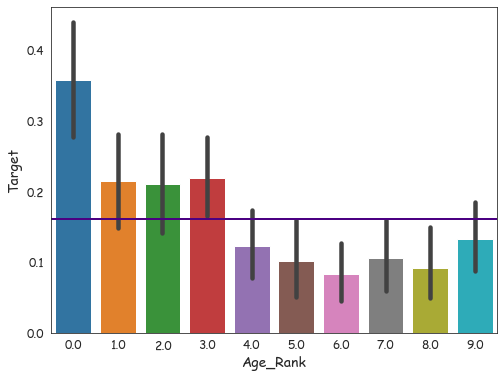

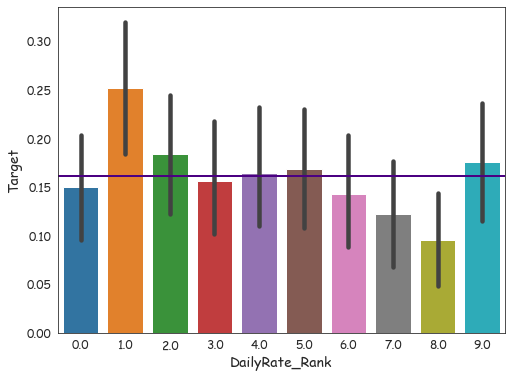

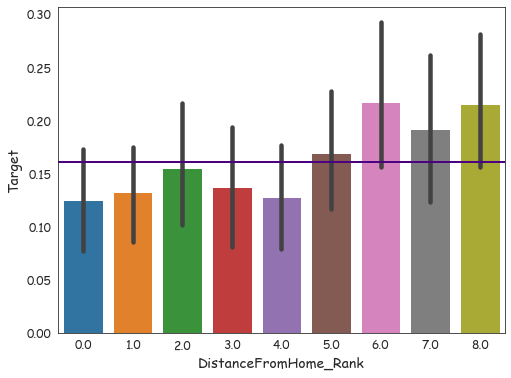

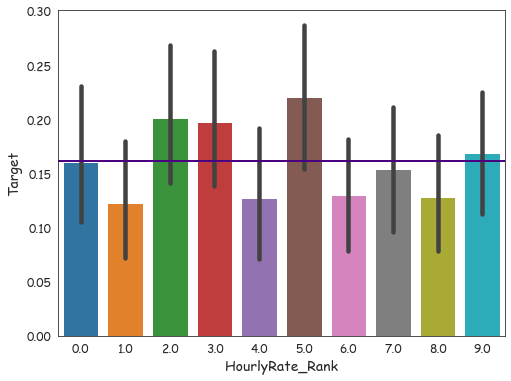

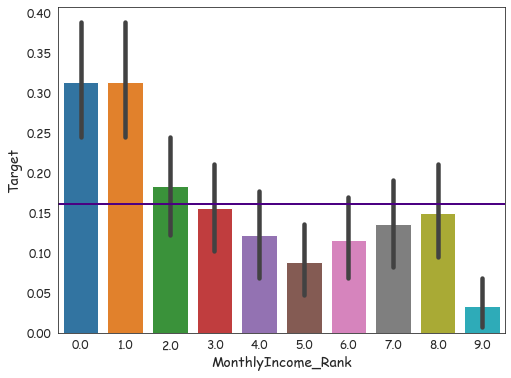

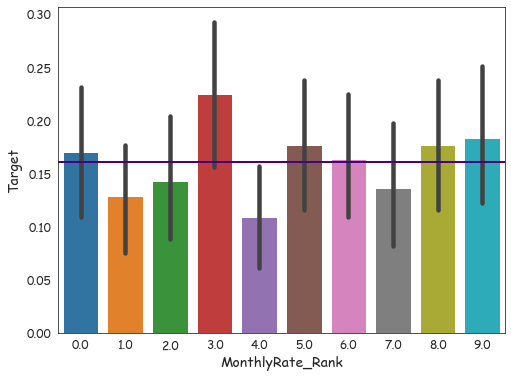

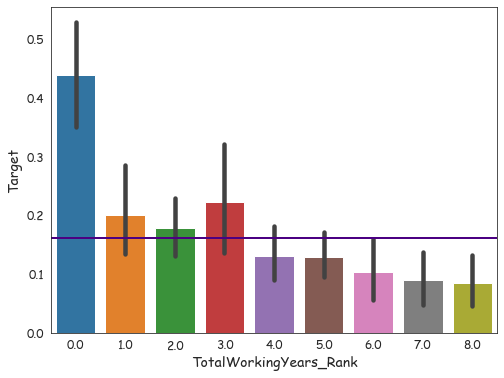

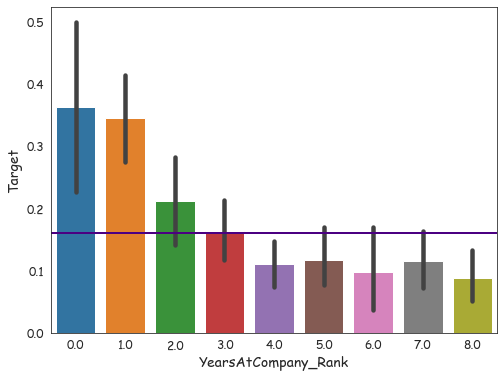

In [36]:
# we check if the features show a slope at all
# If they do, then do we see some deciles below the population average and some higher than population average?
# If that is the case then the slope will be strong
# Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

x_bin_combined = pd.concat([y, num_binned], axis=1, join='inner')

from numpy import mean
for col in num_binned.columns:
    plt.figure(figsize=(8,6))
    sns.barplot(x=col, y='Target', data=x_bin_combined, estimator=mean)
    plt.axhline(y=y.mean(), color='indigo', lw=2)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Target', fontsize=14)
plt.show()

As we can see, DailyRate , HourlyRate, MonthlyRate does not have good slopes below and above the population average, so these are not good predictors. We will be dropping these 3 columns.

In [37]:
num_varlist=['DailyRate','HourlyRate','MonthlyRate']
num_no_mv=num_no_mv.drop(num_varlist,axis=1)

In [38]:
num_no_mv

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany
0,41.0,1,5993.0,8,6
1,49.0,8,5130.0,10,10
2,37.0,2,2090.0,7,0
3,33.0,3,2909.0,8,8
4,27.0,2,3468.0,6,2
...,...,...,...,...,...
1465,36.0,23,2571.0,17,5
1466,39.0,6,9991.0,9,7
1467,27.0,4,6142.0,6,6
1468,49.0,2,5390.0,17,9


### Part 3: Select K-Best

In [39]:
from sklearn.feature_selection import chi2, SelectKBest
selector = SelectKBest(chi2, k=4)
selector.fit_transform(num_no_mv, y)

# we will get only the columns we want to keep
cols = selector.get_support(indices=True)
select_features_num = num_no_mv.iloc[:, cols]

In [40]:
select_features_num

,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany
0,41.0,5993.0,8,6
1,49.0,5130.0,10,10
2,37.0,2090.0,7,0
3,33.0,2909.0,8,8
4,27.0,3468.0,6,2
...,...,...,...,...
1465,36.0,2571.0,17,5
1466,39.0,9991.0,9,7
1467,27.0,6142.0,6,6
1468,49.0,5390.0,17,9


Here, we are performing the chi-squared test and selecting only the 4 best features to keep.

## Feature Selection - Categorical Features

### Part 1: Bi-Variate Analysis

In [41]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x)))

In [42]:
char_unique_levels.columns=['feature_levels']
slice1=char_unique_levels.loc[char_unique_levels['feature_levels']>1]
cat_list=slice1.index
char=char.loc[:,cat_list]

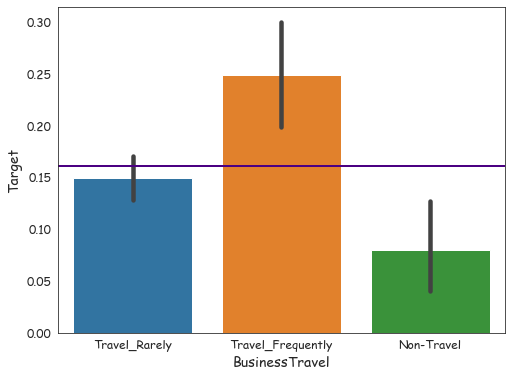

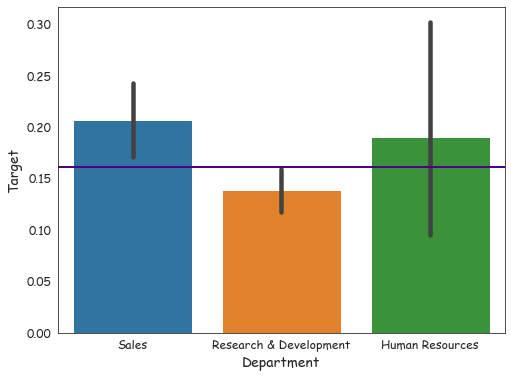

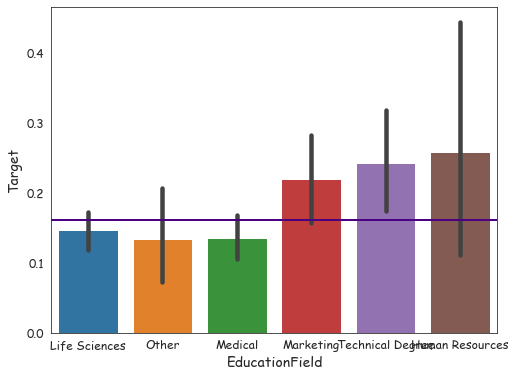

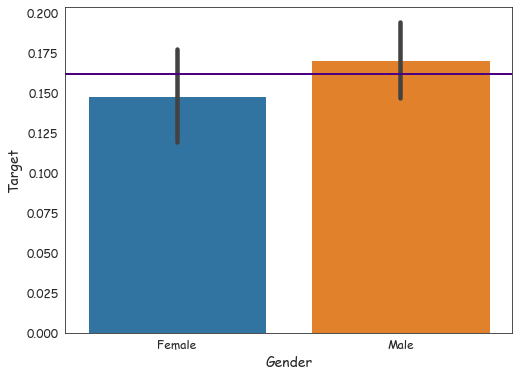

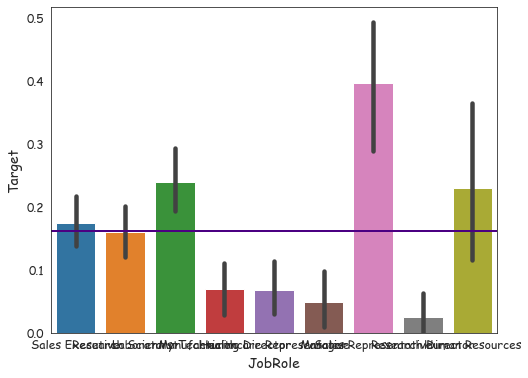

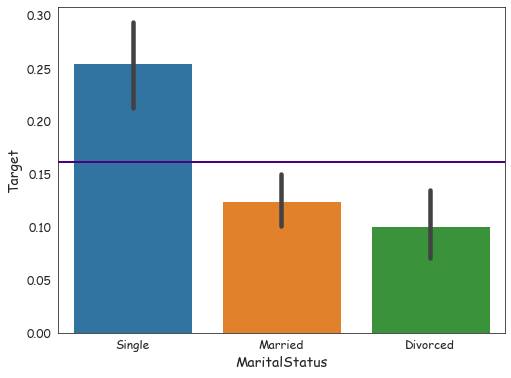

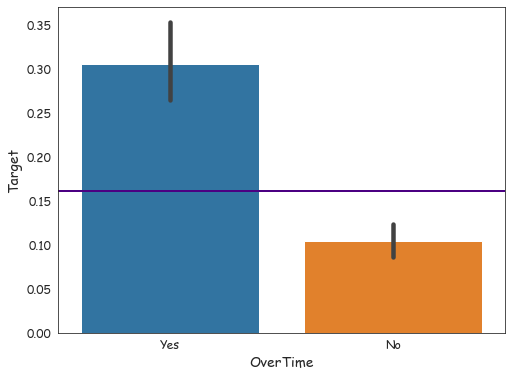

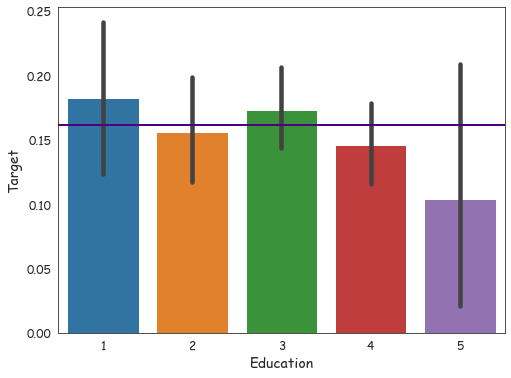

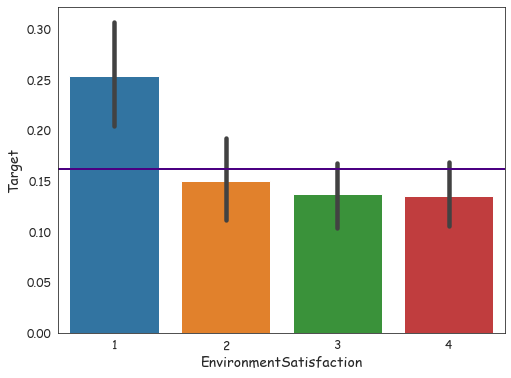

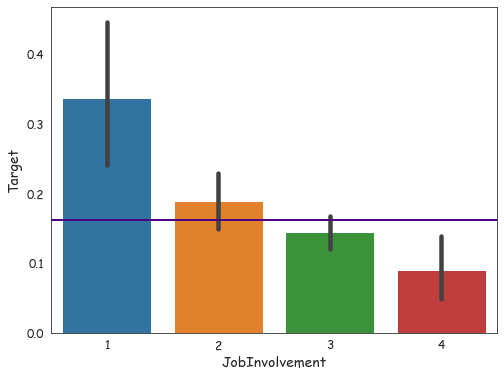

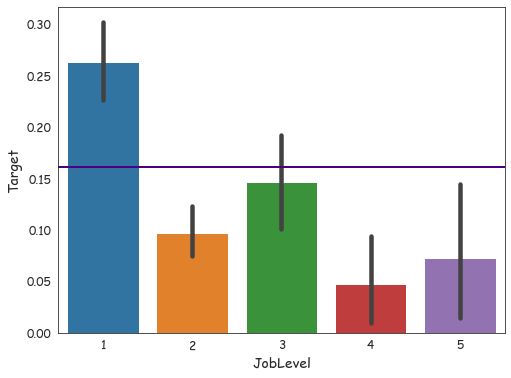

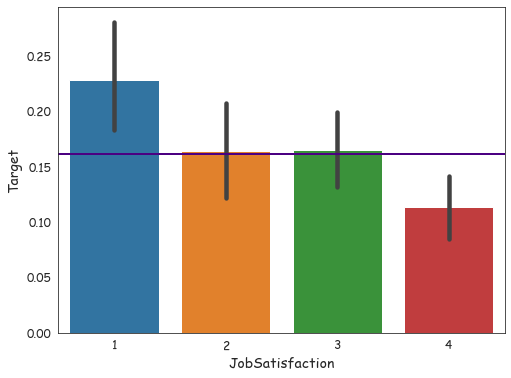

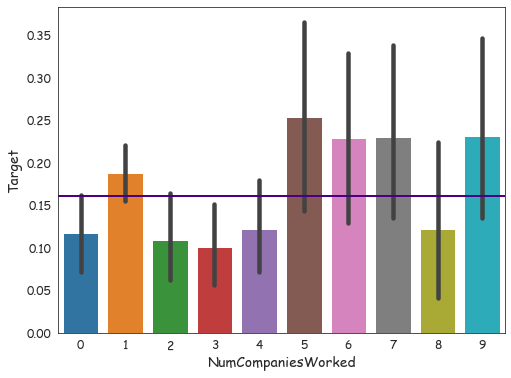

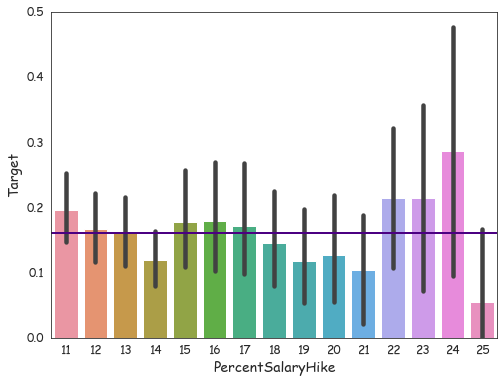

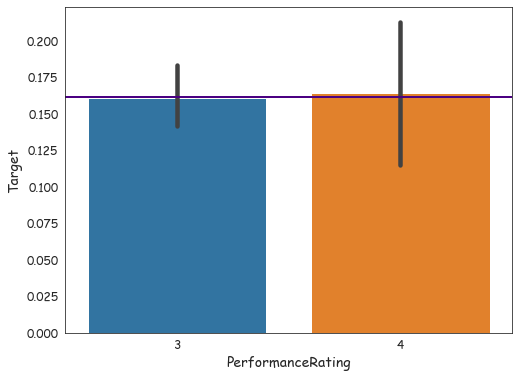

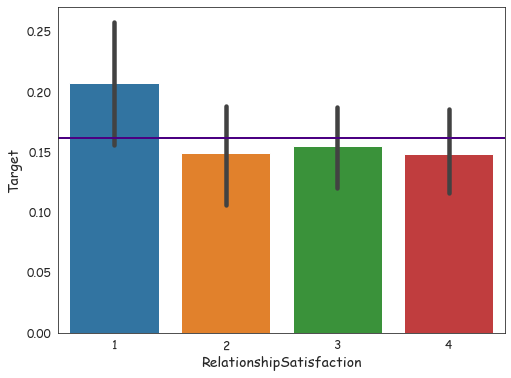

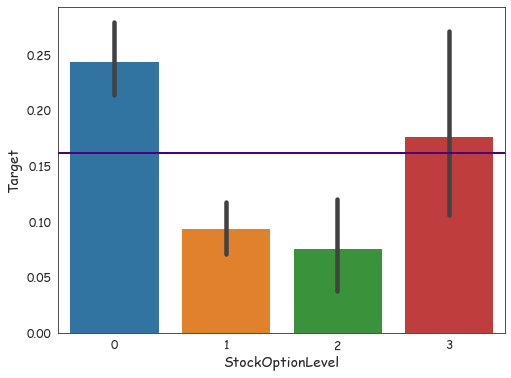

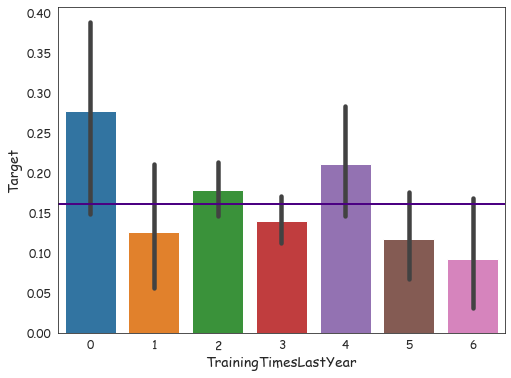

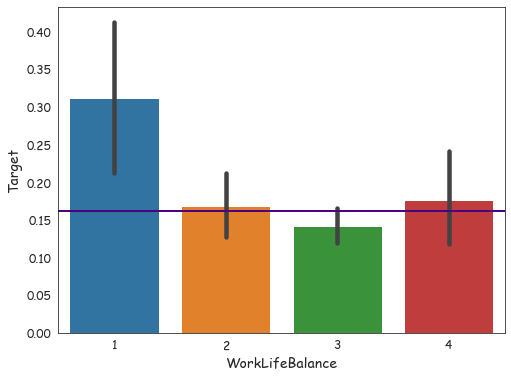

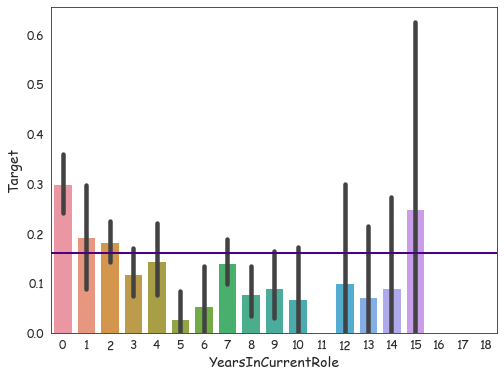

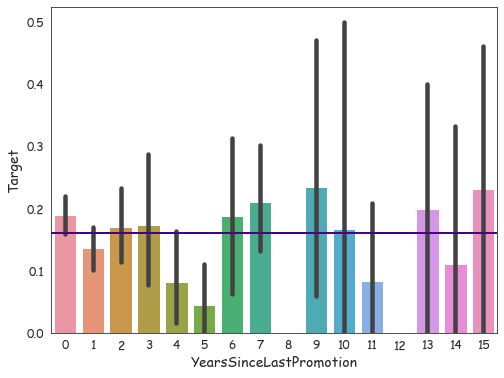

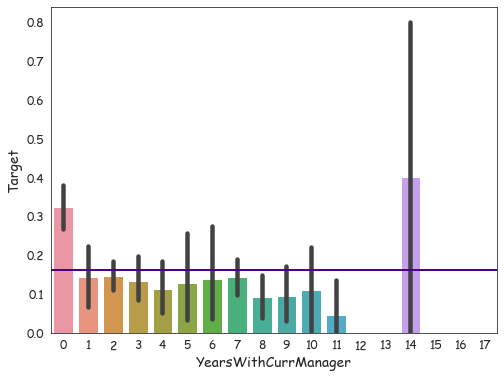

In [43]:
x_char_merged = pd.concat([y, char], axis=1, join='inner')

from numpy import mean
for col in char.columns:
    plt.figure(figsize=(8,6))
    sns.barplot(x=col, y='Target', data=x_char_merged, estimator=mean)
    plt.axhline(y=y.mean(), color='indigo', lw=2)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Target', fontsize=14)
plt.show()

We can see that 'Gender','Education','PerformanceRating' columns does not have a good slope and therefore provides little predictive power. So we will be dropping these columns.

In [44]:
char_list = ['Gender','Education','PerformanceRating']
char_removed_columns = char.drop(char_list, axis=1)

In [45]:
char_removed_columns.dtypes

BusinessTravel              object
Department                  object
EducationField              object
JobRole                     object
MaritalStatus               object
OverTime                    object
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [46]:
char_removed_columns = char_removed_columns.astype('object')
char_removed_columns.dtypes

BusinessTravel              object
Department                  object
EducationField              object
JobRole                     object
MaritalStatus               object
OverTime                    object
EnvironmentSatisfaction     object
JobInvolvement              object
JobLevel                    object
JobSatisfaction             object
NumCompaniesWorked          object
PercentSalaryHike           object
RelationshipSatisfaction    object
StockOptionLevel            object
TrainingTimesLastYear       object
WorkLifeBalance             object
YearsInCurrentRole          object
YearsSinceLastPromotion     object
YearsWithCurrManager        object
dtype: object

In [47]:
# Create dummy features with n-1 levels
x_char_dum = pd.get_dummies(char_removed_columns, drop_first = True)
x_char_dum.shape

(1470, 121)

In [48]:
x_char_dum.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,NumCompaniesWorked_1,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5,NumCompaniesWorked_6,NumCompaniesWorked_7,NumCompaniesWorked_8,NumCompaniesWorked_9,PercentSalaryHike_12,PercentSalaryHike_13,PercentSalaryHike_14,PercentSalaryHike_15,PercentSalaryHike_16,PercentSalaryHike_17,PercentSalaryHike_18,PercentSalaryHike_19,PercentSalaryHike_20,PercentSalaryHike_21,PercentSalaryHike_22,PercentSalaryHike_23,PercentSalaryHike_24,PercentSalaryHike_25,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,YearsInCurrentRole_1,YearsInCurrentRole_2,YearsInCurrentRole_3,YearsInCurrentRole_4,YearsInCurrentRole_5,YearsInCurrentRole_6,YearsInCurrentRole_7,YearsInCurrentRole_8,YearsInCurrentRole_9,YearsInCurrentRole_10,YearsInCurrentRole_11,YearsInCurrentRole_12,YearsInCurrentRole_13,YearsInCurrentRole_14,YearsInCurrentRole_15,YearsInCurrentRole_16,YearsInCurrentRole_17,YearsInCurrentRole_18,YearsSinceLastPromotion_1,YearsSinceLastPromotion_2,YearsSinceLastPromotion_3,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_6,YearsSinceLastPromotion_7,YearsSinceLastPromotion_8,YearsSinceLastPromotion_9,YearsSinceLastPromotion_10,YearsSinceLastPromotion_11,YearsSinceLastPromotion_12,YearsSinceLastPromotion_13,YearsSinceLastPromotion_14,YearsSinceLastPromotion_15,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Part 2: Select K-Best

In [49]:
selector = SelectKBest(chi2, k=60)
selector.fit_transform(x_char_dum, y)

# we will get only the columns we want to keep
cols = selector.get_support(indices=True)
select_features_char = x_char_dum.iloc[:, cols]

We are performing a chi-squared test and determining the best 60 features to keep which will be useful for creating our model.

In [50]:
select_features_char

,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_4,JobLevel_5,JobSatisfaction_4,NumCompaniesWorked_1,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5,NumCompaniesWorked_6,NumCompaniesWorked_7,NumCompaniesWorked_9,PercentSalaryHike_14,PercentSalaryHike_24,StockOptionLevel_1,StockOptionLevel_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_3,YearsInCurrentRole_3,YearsInCurrentRole_5,YearsInCurrentRole_6,YearsInCurrentRole_8,YearsInCurrentRole_9,YearsInCurrentRole_10,YearsInCurrentRole_11,YearsSinceLastPromotion_1,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_8,YearsSinceLastPromotion_12,YearsWithCurrManager_4,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1466,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1467,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1468,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Creating the Master feature set for Model Development

In [51]:
x_all = pd.concat([select_features_num, select_features_char], axis=1, join='inner')

In [52]:
x_all.head()

,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_4,JobLevel_5,JobSatisfaction_4,NumCompaniesWorked_1,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5,NumCompaniesWorked_6,NumCompaniesWorked_7,NumCompaniesWorked_9,PercentSalaryHike_14,PercentSalaryHike_24,StockOptionLevel_1,StockOptionLevel_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_3,YearsInCurrentRole_3,YearsInCurrentRole_5,YearsInCurrentRole_6,YearsInCurrentRole_8,YearsInCurrentRole_9,YearsInCurrentRole_10,YearsInCurrentRole_11,YearsSinceLastPromotion_1,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_8,YearsSinceLastPromotion_12,YearsWithCurrManager_4,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14
0,41.0,5993.0,8,6,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,49.0,5130.0,10,10,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,37.0,2090.0,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,33.0,2909.0,8,8,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27.0,3468.0,6,2,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [53]:
y.mean()

0.16122448979591836

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_all, y, test_size=0.3, random_state=40)

In [55]:
print("Shape of training data: ", x_train.shape)
print("Shape of testing data: ", x_test.shape)
print("Attrition Rate in training data: ", y_train.mean())
print("Attrition Rate in testing data: ", y_test.mean())

Shape of training data:  (1029, 64)
Shape of testing data:  (441, 64)
Attrition Rate in training data:  0.16132167152575316
Attrition Rate in testing data:  0.16099773242630386


## Modelling

Non Linearity in feature relationships are observed which makes tree methods a good choice<br>
We will consider few options among trees
> White Box (Completely Explainable Set of Rules) - Decision Tree<br>
  Ensemble Methods - Random Forest (With Bagging)<br>
  Ensemble Methods - GBM/XGBoost (Boosting)<br>

### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', random_state=40)

In [57]:
# fitting the decision tree
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=40)

In [58]:
# let's use GridSearchCv to find the best parameters for our model

from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 4, 5], 'min_samples_split': [50,60,70,80,90,100] }
tree_grid = GridSearchCV(dtree, param_grid=param_dist, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(x_train, y_train)
print("Best parameters of GridSearch: ", tree_grid.best_params_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best parameters of GridSearch:  {'max_depth': 3, 'min_samples_split': 50}


In [59]:
# fitting the decision tree with the improved parameters

dtree_grid_search = DecisionTreeClassifier(criterion='gini', random_state=40, max_depth=4, min_samples_split=50)
dtree_grid_search.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=50, random_state=40)

### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', random_state=40, max_depth=4, min_samples_split=50)

In [61]:
# fitting the random forest model
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=50, random_state=40)

### Gradient Boost

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(criterion='mse', random_state=40, max_depth=4, min_samples_split=50)

In [63]:
gbm.fit(x_train, y_train)

GradientBoostingClassifier(criterion='mse', max_depth=4, min_samples_split=50,
                           random_state=40)

### Feature Importance

We will see how different features contribute in different models

Decision Tree


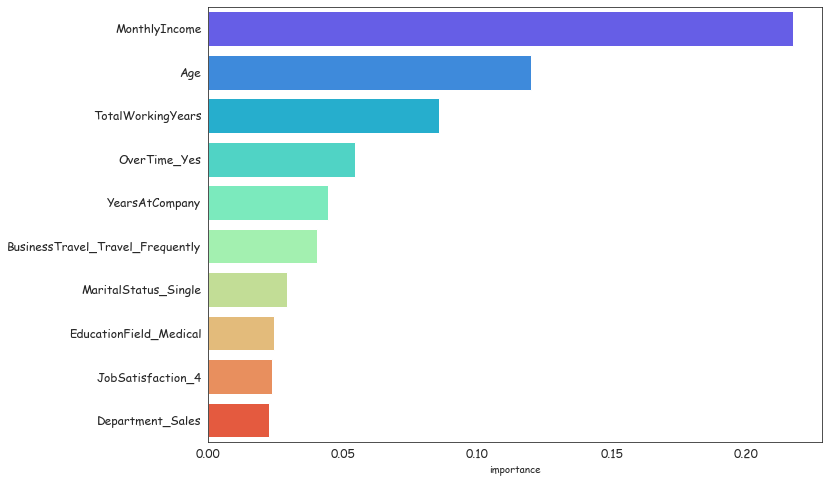

In [64]:
feature_importances_dtree = pd.DataFrame(dtree.feature_importances_, 
                                         index=x_train.columns, 
                                         columns={'importance'}).sort_values('importance',ascending=False)
print("Decision Tree")

sns.barplot(x='importance', y=feature_importances_dtree.iloc[0:10].index, 
            data=feature_importances_dtree.iloc[0:10], palette='rainbow');

Decision Tree with GridSearch


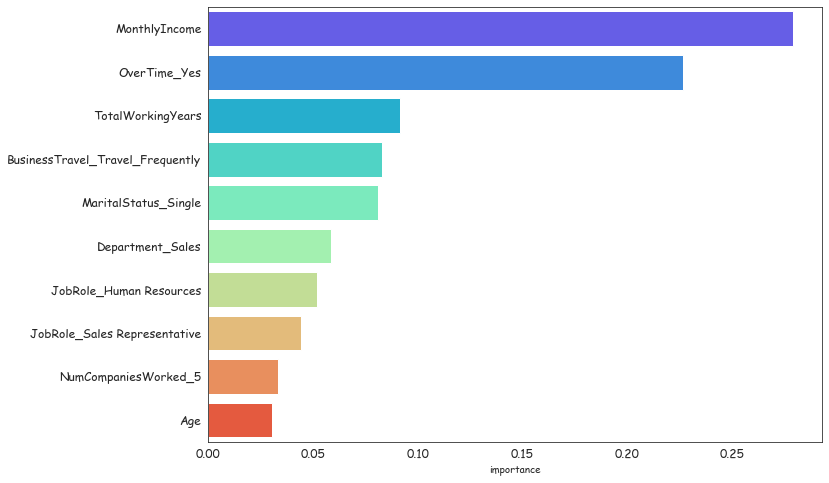

In [65]:
feature_importances_dtree_grid_search = pd.DataFrame(dtree_grid_search.feature_importances_, 
                                         index=x_train.columns, 
                                         columns={'importance'}).sort_values('importance',ascending=False)
print("Decision Tree with GridSearch")
sns.barplot(x='importance', y=feature_importances_dtree_grid_search.iloc[0:10].index, 
            data=feature_importances_dtree_grid_search.iloc[0:10], palette='rainbow');

Random Forest


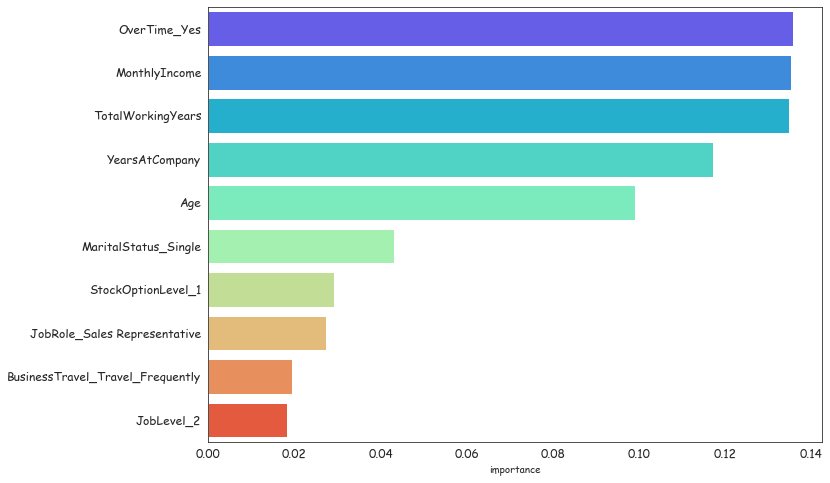

In [66]:
feature_importances_rf= pd.DataFrame(rf.feature_importances_, 
                                         index=x_train.columns, 
                                         columns={'importance'}).sort_values('importance',ascending=False)
print("Random Forest")
sns.barplot(x='importance', y=feature_importances_rf.iloc[0:10].index, 
            data=feature_importances_rf.iloc[0:10], palette='rainbow');

Gradient Boosting Model


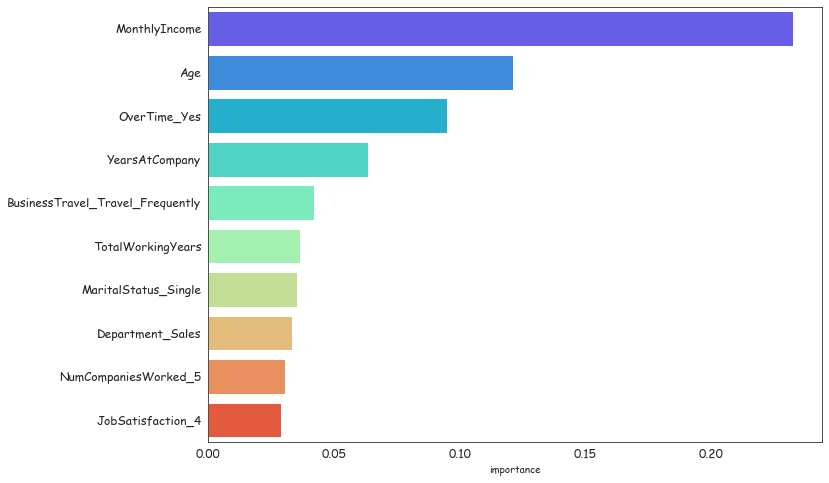

In [67]:
feature_importances_gbm= pd.DataFrame(gbm.feature_importances_, 
                                         index=x_train.columns, 
                                         columns={'importance'}).sort_values('importance',ascending=False)
print("Gradient Boosting Model")
sns.barplot(x='importance', y=feature_importances_gbm.iloc[0:10].index, 
            data=feature_importances_gbm.iloc[0:10], palette='rainbow');

## Model Evaluation

We will be creating the confusion matrix as well as displaying the accuracy, recall, precision and the f1 score in order to determine which is the best model for our project.

In [68]:
y_pred_tree = dtree.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_gbm = gbm.predict(x_test)
y_pred_tree_grid_search = dtree_grid_search.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix


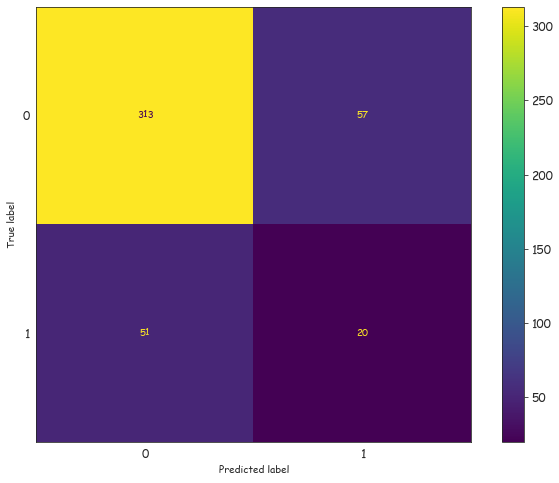

In [70]:
plot_confusion_matrix(dtree, x_test, y_test)

In [71]:
print("Decision Tree ------------------------------>")
print("Accuracy: ", accuracy_score(y_test, y_pred_tree))
print("Recall: ", recall_score(y_test, y_pred_tree))
print("Precision: ", precision_score(y_test, y_pred_tree))
print("F1 score: ", f1_score(y_test, y_pred_tree))

Decision Tree ------------------------------>
Accuracy:  0.7551020408163265
Recall:  0.28169014084507044
Precision:  0.2597402597402597
F1 score:  0.2702702702702703


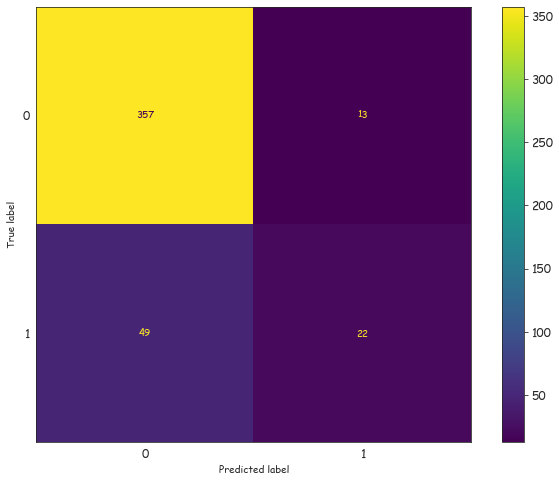

In [72]:
plot_confusion_matrix(dtree_grid_search, x_test, y_test)

In [73]:
print("Decision Tree with GridSearch-------------------------------->")
print("Accuracy: ", accuracy_score(y_test, y_pred_tree_grid_search))
print("Recall: ", recall_score(y_test, y_pred_tree_grid_search))
print("Precision: ", precision_score(y_test, y_pred_tree_grid_search))
print("F1 score: ", f1_score(y_test, y_pred_tree_grid_search))

Decision Tree with GridSearch-------------------------------->
Accuracy:  0.8594104308390023
Recall:  0.30985915492957744
Precision:  0.6285714285714286
F1 score:  0.4150943396226415


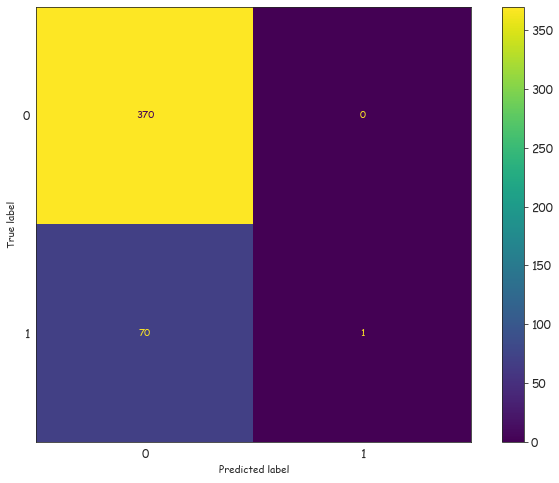

In [74]:
plot_confusion_matrix(rf, x_test, y_test)

In [75]:
print("Random Forest ------------------------------------->")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Recall: ", recall_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf))
print("F1 score: ", f1_score(y_test, y_pred_rf))

Random Forest ------------------------------------->
Accuracy:  0.8412698412698413
Recall:  0.014084507042253521
Precision:  1.0
F1 score:  0.02777777777777778


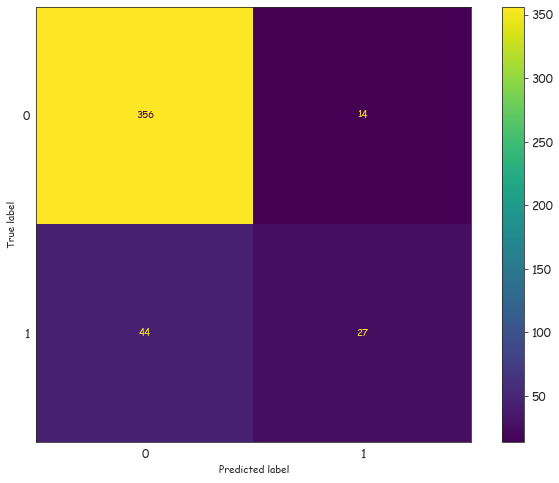

In [76]:
plot_confusion_matrix(gbm, x_test, y_test)

In [77]:
print("Gradient Boosting------------------------------------->")
print("Accuracy: ", accuracy_score(y_test, y_pred_gbm))
print("Recall: ", recall_score(y_test, y_pred_gbm))
print("Precision: ", precision_score(y_test, y_pred_gbm))
print("F1 score: ", f1_score(y_test, y_pred_gbm))

Gradient Boosting------------------------------------->
Accuracy:  0.8684807256235828
Recall:  0.38028169014084506
Precision:  0.6585365853658537
F1 score:  0.4821428571428571


As we can see, the Gradient Boosting model performs the best with the highest accuracy score of 86%. So we will proceed with our predictions with this model.

## Capturing the events and the non-events rate

In [78]:
# we are taking the 2nd column from predict_proba as it will give us the probability of attrition
# the 1st column will give us the probability of non-attrition
y_pred_prob = gbm.predict_proba(x_all)[:, 1]
data['y_pred_P'] = pd.DataFrame(y_pred_prob)

# we are creating 10 ranks based on probability values. Rank 10 will have the highest probability of attrition
# while Rank 1 will have the lowest probability.
data['P_Rank_gbm'] = pd.qcut(data['y_pred_P'].rank(method='first').values, 10, duplicates='drop').codes+1
rank_df_actuals = pd.DataFrame(data.groupby('P_Rank_gbm')['Target'].agg(['count', 'mean']))
rank_df_actuals.rename(columns={'mean': 'Actual_Event_Rate'}, inplace=True)

sorted_rank_df = rank_df_actuals.sort_values(by='P_Rank_gbm', ascending=False)
# we are getting the total number of attriters for every rank
sorted_rank_df['N_events']=rank_df_actuals['count']*rank_df_actuals['Actual_Event_Rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
# we are calculating the percentage of events(i.e percentage of attriters) present in every rank
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

# we are using the Kolmogorov–Smirnov test to understand the difference between the event cap and the non-event cap.
sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_Event_Rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_gbm,count,Actual_Event_Rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Decile,Lift_over_Avg
0,10,147,0.918367,135.0,135.0,0.569620,0.569620,12.0,12.0,0.009732,0.009732,0.5599,1,5.696203
1,9,147,0.469388,69.0,204.0,0.291139,0.860759,78.0,90.0,0.063260,0.072993,0.7878,2,2.911392
2,8,147,0.047619,7.0,211.0,0.029536,0.890295,140.0,230.0,0.113544,0.186537,0.7038,3,0.295359
3,7,147,0.102041,15.0,226.0,0.063291,0.953586,132.0,362.0,0.107056,0.293593,0.6600,4,0.632911
4,6,147,0.006803,1.0,227.0,0.004219,0.957806,146.0,508.0,0.118410,0.412003,0.5458,5,0.042194
5,5,147,0.013605,2.0,229.0,0.008439,0.966245,145.0,653.0,0.117599,0.529603,0.4366,6,0.084388
6,4,147,0.013605,2.0,231.0,0.008439,0.974684,145.0,798.0,0.117599,0.647202,0.3275,7,0.084388
7,3,147,0.013605,2.0,233.0,0.008439,0.983122,145.0,943.0,0.117599,0.764801,0.2183,8,0.084388
8,2,147,0.020408,3.0,236.0,0.012658,0.995781,144.0,1087.0,0.116788,0.881590,0.1142,9,0.126582
9,1,147,0.006803,1.0,237.0,0.004219,1.000000,146.0,1233.0,0.118410,1.000000,-0.0000,10,0.042194


We can see that in rank 10, 147 employees are present, out of which 91% are going to attrite. So we can report this to our managers or the HR group that they need to focus on these 147 people and make sure that they do not leave the company. This analysis helps a lot as it shows us the target audience on whom to focus, instead of focusing on a huge population of employees. <br>
The KS test also shows that after the 2nd decile, the statistic starts to decrease, telling us that our main attriters are present in the top 2 deciles(Rank 10 and Rank 9) and we need to focus on them to retain.<br>
The KS statistic shows the difference between the event capture and the non-event capture of every rank.<br>
Here, we will take a safer approach and focus on the top 30% of the employees who are going to attrite. So our audience becomes has been limited from the total sample to only 30% of them.<br>
The amount of effort and resources, as a result is decreased by a good margin!!!!


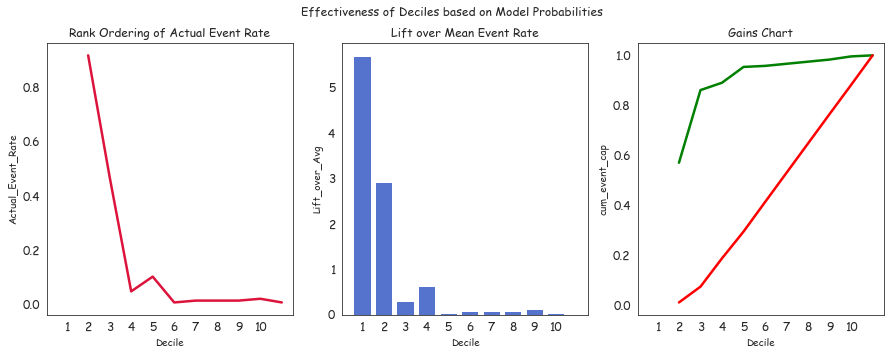

In [79]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle("Effectiveness of Deciles based on Model Probabilities")
axes[0].set_title("Rank Ordering of Actual Event Rate")
axes[1].set_title("Lift over Mean Event Rate")
axes[2].set_title("Gains Chart")

sns.lineplot(ax=axes[0], x='Decile', y='Actual_Event_Rate', data=sorted_reindexed, color='crimson');
sns.barplot(ax=axes[1], x='Decile', y='Lift_over_Avg', data=sorted_reindexed, color='royalblue');
sns.lineplot(ax=axes[2], x='Decile', y='cum_event_cap', data=sorted_reindexed, color='green');
sns.lineplot(ax=axes[2], x='Decile', y='cum_non_event_cap', data=sorted_reindexed, color='red');
plt.show()

## APT Framework
## A - Audience   P - Prioritization   T - Treatment

### Audience

In [80]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target,y_pred_P,P_Rank_gbm
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1,0.108633,7
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,0.057515,6
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,0.802904,10
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,0.511770,9
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,0.196316,8


In [81]:
data['Predicted_cancel_Rank']=np.where(data['P_Rank_gbm']< 8,"Bottom7","Top3")
data.Predicted_cancel_Rank.value_counts()

Bottom7    1029
Top3        441
Name: Predicted_cancel_Rank, dtype: int64

In [82]:
data['Target'].mean()

0.16122448979591836

In [83]:
data.groupby('Predicted_cancel_Rank')['Target'].agg(['mean','count','sum'])

,mean,count,sum
Predicted_cancel_Rank,,,
Bottom7,0.025267,1029,26
Top3,0.478458,441,211


We have further evidence that we need to focus on the top 3 segment of our employees. We can see that the top 3 has an attrition rate of around 48%, which is 3 times the sample attrition rate!!!!<br>
211 people out of 441 left the company(top 3 segment), while only 26 out of 1029 has left the company(bottom 7 segment).<br>


In [84]:
data_top_3 = data.loc[data['Predicted_cancel_Rank'] == 'Top3']
data_top_3.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target,y_pred_P,P_Rank_gbm,Predicted_cancel_Rank
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,0.802904,10,Top3
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,0.511770,9,Top3
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,0.196316,8,Top3
14,28,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3,1,0.956565,10,Top3
21,36,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3,1,0.509179,9,Top3


In [85]:
data_top_3.shape

(441, 37)

We keep only the rows which belong to the top3 segment. This is our target audience.

### Prioritization

As we saw from the GBM model, the most important factor which drives attrition is monthly income. We will be focusing on this feature and another called Total Working Years, which tells us how much an employee has been working in the company.<br>
These two features combined will help us to create segments.<br>
Based on the attrition rates of these segments, we can deliver analytical insights to the HR managers on which group to focus and reduce the amount of resources spent.

In [86]:
data_top_3['income_RANK'] = pd.qcut(data_top_3['MonthlyIncome'].rank(method='first').values, 10, duplicates='drop').codes+1
data_top_3.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target,y_pred_P,P_Rank_gbm,Predicted_cancel_Rank,income_RANK
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,0.802904,10,Top3,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,0.511770,9,Top3,4
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,0.196316,8,Top3,5
14,28,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3,1,0.956565,10,Top3,1
21,36,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3,1,0.509179,9,Top3,5


In [87]:
data_top_3.groupby('income_RANK')['MonthlyIncome'].agg(['min','mean','max'])

,min,mean,max
income_RANK,,,
1,1009,1637.511111,2090
2,2097,2238.977273,2342
3,2342,2441.931818,2592
4,2593,2737.250000,2909
5,2909,3220.840909,3633
6,3646,4164.613636,4648
7,4668,5037.590909,5473
8,5562,6315.386364,7264
9,7314,8694.545455,9980


In [88]:
data_top_3.MonthlyIncome.mean()

4990.918367346939

In [89]:
data_top_3['income_group']=np.where(data_top_3['MonthlyIncome']> data_top_3['MonthlyIncome'].mean(),"High Income","Low Income")
data_top_3.income_group.value_counts()

Low Income     289
High Income    152
Name: income_group, dtype: int64

In [90]:
data_top_3['income_segment']=np.where(data_top_3['income_RANK']>=7,"High Income","Low Income")
data_top_3.income_segment.value_counts()

Low Income     265
High Income    176
Name: income_segment, dtype: int64

In [91]:
data_top_3['tot_work_exp_RANK']=pd.qcut(data_top_3['TotalWorkingYears'].rank(method='first').values,10,duplicates='drop').codes+1
data_top_3.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target,y_pred_P,P_Rank_gbm,Predicted_cancel_Rank,income_RANK,income_group,income_segment,tot_work_exp_RANK
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,0.802904,10,Top3,1,Low Income,Low Income,5
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,0.511770,9,Top3,4,Low Income,Low Income,6
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,0.196316,8,Top3,5,Low Income,Low Income,4
14,28,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3,1,0.956565,10,Top3,1,Low Income,Low Income,4
21,36,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3,1,0.509179,9,Top3,5,Low Income,Low Income,7


In [92]:
data_top_3.groupby('tot_work_exp_RANK')['TotalWorkingYears'].agg(['min','mean','max'])

,min,mean,max
tot_work_exp_RANK,,,
1,0,0.800000,1
2,1,1.409091,3
3,3,3.568182,4
4,5,5.431818,6
5,6,6.477273,7
6,7,8.159091,9
7,9,9.681818,10
8,10,10.704545,12
9,12,14.613636,18


In [93]:
data_top_3.TotalWorkingYears.mean()

8.600907029478458

In [94]:
data_top_3['Work_Exp_Segment']=np.where(data_top_3['tot_work_exp_RANK']>=7,"High Work Experience","Low Work Experience")
data_top_3.Work_Exp_Segment.value_counts()

Low Work Experience     265
High Work Experience    176
Name: Work_Exp_Segment, dtype: int64

In [95]:
data_top_3['work_exp_group']=np.where(data_top_3['TotalWorkingYears']> data_top_3['TotalWorkingYears'].mean(),"High Work Experience","Low Work Experience")
data_top_3.work_exp_group.value_counts()

Low Work Experience     252
High Work Experience    189
Name: work_exp_group, dtype: int64

In [96]:
pd.crosstab(index=data_top_3['work_exp_group'], columns=data_top_3['income_group'],values=data_top_3['TotalWorkingYears'],aggfunc='count')

income_group,High Income,Low Income
work_exp_group,,
High Work Experience,130,59
Low Work Experience,22,230


In [97]:
pd.crosstab(index=data_top_3['work_exp_group'], columns=data_top_3['income_group'],values=data_top_3['Target'],aggfunc='mean')

income_group,High Income,Low Income
work_exp_group,,
High Work Experience,0.384615,0.440678
Low Work Experience,0.636364,0.526087


### Treatment

1. Although it's a rare case, we can see that employees with low work experience and high income have the highest probability to attrite. Maybe they want to switch companies which have minimal hikes, as they already have high salaries for low work experience. They might not be accustomed to the working environment and want to leave the company.<br>
<br>
2. Next comes employees with low work experience and low income. They want reasonable hikes which can be achieved by switching companies.<br>
<br>
3. People with higher work experience tends to be stable and do not want to leave the companies. The employees with lower incomes still have a higher probability to attrite as they want more salary, which is reasonable based on their experience.

